In [10]:
from graph import plot_irv_pairwise_matrix

In [2]:
from main import Database

In [3]:
db = Database('bot.sqlite3')
await db.connect()

In [17]:
res = await db.get_all_ballots()
len(res)

207

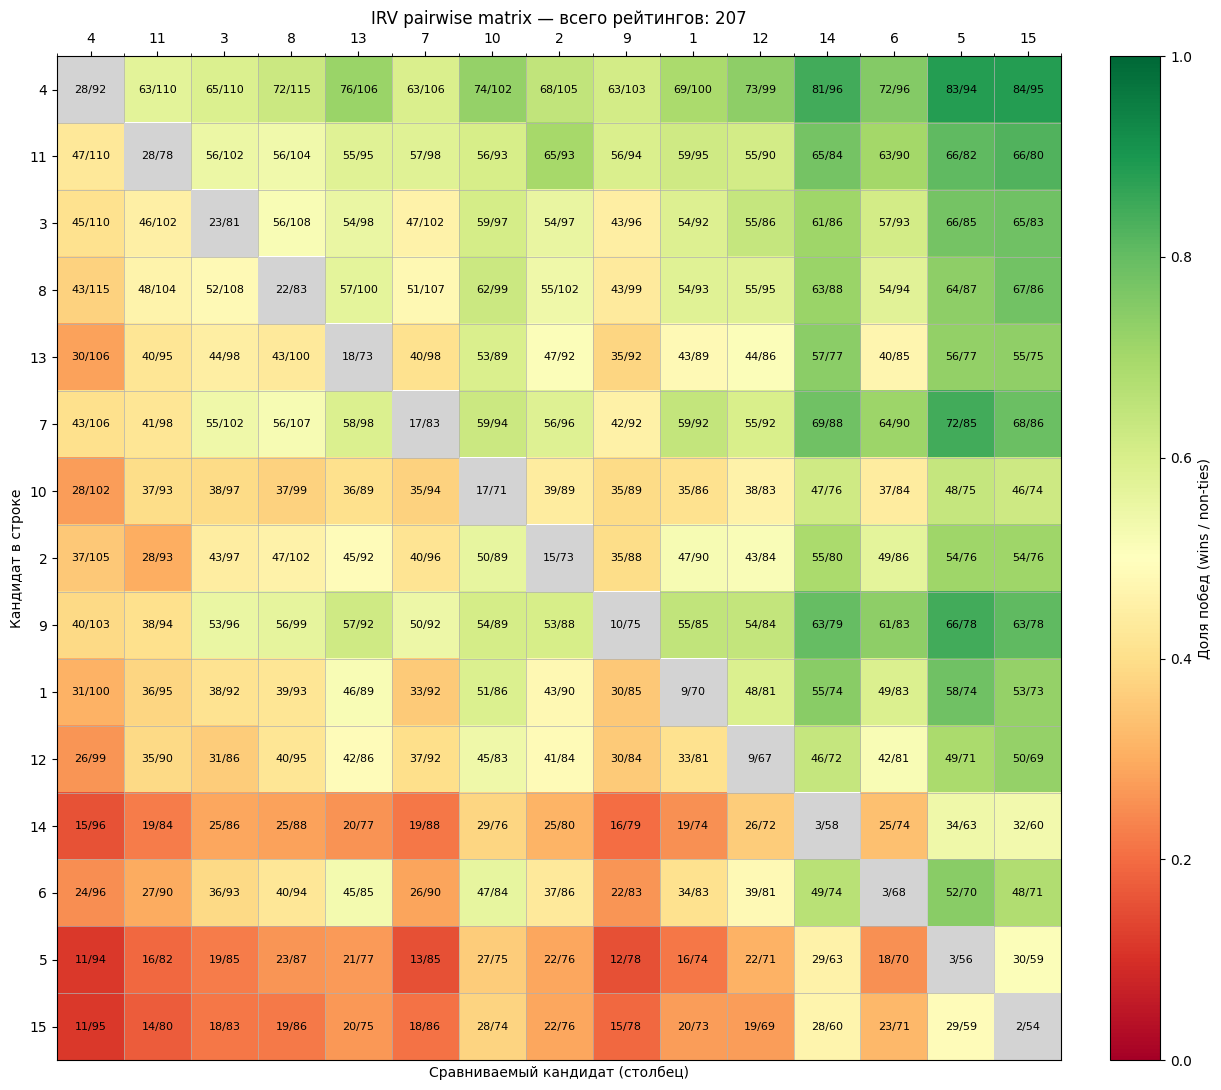

In [18]:
fig, ax = plot_irv_pairwise_matrix(res, candidate_ids=list(range(1, 16)), labels=None)
plt.show()

In [12]:
fig.savefig("irv_matrix.png", dpi=300, bbox_inches="tight")

In [22]:
import sqlite3
import json

In [2]:
db = sqlite3.connect('bot.sqlite3')

In [16]:
query = """
SELECT a.user_id, b.ranking_json
FROM (SELECT max(id) AS id, user_id FROM `ballots` GROUP BY user_id) AS a
LEFT JOIN `ballots` AS b ON b.id = a.id
ORDER BY a.user_id
"""
res = db.execute(query).fetchall()
len(res)

261

In [17]:
query = """
SELECT a.user_id, b.ranking_json
FROM (SELECT max(id) AS id, user_id FROM `ballots` WHERE is_single_vote = 1 GROUP BY user_id) AS a
LEFT JOIN `ballots` AS b ON b.id = a.id
ORDER BY a.user_id
"""
res2 = db.execute(query).fetchall()
len(res2)

261

In [25]:
[int(json.loads(x)[0] == json.loads(y)[0]) for ((_, x), (_, y)) in zip(res, res2)].index(0)

149

In [26]:
res[149]

(1912560067, '[10, 13, 15, 3, 1, 12, 11, 4, 5, 6, 2, 7, 8, 9, 14]')

In [27]:
res2[149]

(1912560067, '[13]')

In [28]:
db.execute("SELECT * FROM ballots WHERE user_id = 1912560067").fetchall()

[(35, 1912560067, 'darkbowman', '[13]', '2026-01-18T14:16:41.969223+00:00', 1),
 (54,
  1912560067,
  'darkbowman',
  '[10, 13, 15, 3, 1, 12, 11, 4, 5, 6, 2, 7, 8, 9, 14]',
  '2026-01-18T14:23:11.670012+00:00',
  0)]

In [30]:
json.dumps([json.loads(row) for _, row in res])

'[[1, 3, 4], [8], [4], [3], [4], [4], [15], [12, 15, 8, 13, 11, 2, 9, 14, 6, 3, 4, 7, 1, 10, 5], [9], [7], [10, 13, 14, 8, 9, 4, 12, 1, 11, 7, 3, 6, 5, 2, 15], [1], [8], [10], [11], [6], [8], [3], [5], [3], [12], [3], [3], [13], [6], [4, 3, 7, 1, 6, 5, 9, 2, 8, 13, 14, 11, 12, 15, 10], [3, 1, 4, 15, 12, 11, 9, 7, 2, 6, 8, 10, 13, 5, 14], [7, 2, 3, 12, 6, 9, 4, 1, 13, 14, 5, 8, 11, 15, 10], [13], [3, 9, 6, 4, 13, 7], [9, 8, 7, 1], [8], [11], [10], [13], [11, 7, 1, 9, 6, 12, 3, 4, 2, 15, 5, 13, 14, 8, 10], [3], [4], [4, 1, 9, 6, 7, 8, 13, 14, 12, 2, 3, 15, 5, 11, 10], [10, 4, 14, 11, 9, 8, 12, 7, 6, 5, 1, 2, 13, 15, 3], [4, 1, 10, 3, 9, 12, 7], [13], [9], [12, 9, 3, 2, 8, 4, 15, 11, 1, 10, 14, 13, 7, 6, 5], [4], [8, 4, 11, 9, 7, 6, 2, 3, 12, 1, 15, 5, 14, 13, 10], [3, 4, 12, 9, 14, 8, 7, 15, 13, 6, 11, 2, 1, 5, 10], [2], [13], [9], [3, 11, 1, 12, 9, 15, 6, 13, 8, 7, 5, 4, 14, 10, 2], [11, 9, 15, 7, 2, 1, 10, 8, 5, 6, 4, 3, 12, 13, 14], [9, 4, 13, 7, 2, 3, 12, 11, 10], [4], [10, 13, 11, 1